In [2]:
#Let's include some common libraries
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
from random import randint,gauss,random
matplotlib.style.use('bmh')
%matplotlib inline

<h1 style="text-align:center">k-Arm Bandit Problem</h1>
<img style="margin-left:320px" src="https://blogs.mathworks.com/images/loren/2016/multiarmedbandit.jpg">

<div style="text-align:center">
    <h4>Let's define k-Arm Distributions, when k is equal to 10
        <br>Assumptions: Value Functions have Normal Distributions<br>
    </h4>
</div>

In [35]:
#Expected Values Vector:
expct_Val = np.array([5,2,8,0.5,0.1,10,5,4,8,2])
#Number of Observations:
n_obs = 1000

<h2>Sample Average Method</h2>

In [ ]:
#First exploratory:
arm_Index = randint(0, 9)
#Matrix of got Values:
obs = np.zeros((n_obs,2))
#Aproximated Function Value Vector
#Q_star = np.ones(10)*15
Q_star = np.zeros(10)
#bool of exploration decition:
will_Explore = True
#Start counting time of execution:
SAM_start_time = time.time()
#Loop of the Agent interaction
for i in range(n_obs):
    ################################################################
    obs[i,0] = gauss(expct_Val[arm_Index],expct_Val[arm_Index]*0.05)
    obs[i,1] = arm_Index
    ################################################################
    num = 0
    den = 0
    for j in range(i):
        one_Predicate = (obs[j,1] == arm_Index)
        num += obs[j,0]*one_Predicate
        den += 1*one_Predicate
    if(den==0):
        Q_star[arm_Index] = 0
    else:
        Q_star[arm_Index] = num/den
    ################################################################
    if(will_Explore):
        arm_Index = randint(0, 9)
    else:
        arm_Index = np.argmax(Q_star)
    ################################################################
    will_Explore = (random()<=0.2)
    ################################################################
#Print the time of execution:
SAM_finish_time = time.time()
print("--- It took %s seconds ---" % (SAM_finish_time - SAM_start_time))
#Plot the observed data:
plt.figure()
plt.plot(np.arange(n_obs),obs[:,0])

In [ ]:
#Vector of gotten Values (which were aproximated by the algorithm)
Q_star

In [ ]:
#Get some information about the observations that the agent did
u, N = np.unique(obs[:,1], return_counts=True)
#Number of observations per value distribution
N

In [ ]:
#Plot the probability distribution:
plt.figure()
plt.plot(np.arange(10),N)

<h2>Incremental Implementation Method</h2>

In [ ]:
#First exploratory:
arm_Index = randint(0, 9)
#Matrix of got Values:
obs = np.zeros(n_obs)
#Aproximated Function Value Vector
Q_star = np.zeros(10)
#Optimistic Initial Value
#Q_star = np.ones(10)*20
#Number of observations per value distribution
N = np.zeros(10)
#bool of exploration decition:
will_Explore = True
#Reward inicialization:
crrn_Reward = 0
#Alpha StepSize Value
alpha = 0.1
#Start counting time of execution:
IIM_start_time = time.time()
#Loop of the Agent interaction
for i in range(n_obs):
    ####################################################################
    will_Explore = (random()<=0.1)
    if(will_Explore):
        arm_Index = randint(0, 9)
    else:
        arm_Index = np.argmax(Q_star)
    ####################################################################
    # R <-- bandit(A)
    crrn_Reward = gauss(expct_Val[arm_Index],expct_Val[arm_Index]*0.05)
    #In memory
    obs[i] = crrn_Reward
    # N(A) <-- N(A) + 1
    N[arm_Index] += 1
    # Q(A) <-- Q(A) + 1/N(A)*[R-Q(A)]
    Q_star[arm_Index] += (crrn_Reward - Q_star[arm_Index])/N[arm_Index]
    # Q(A) <-- Q(A) + alpha*[R-Q(A)]
    #Q_star[arm_Index] += alpha*(crrn_Reward - Q_star[arm_Index])
    ####################################################################
    #expct_Val += np.random.normal(0,0.01,10)
#Print the time of execution:
IIM_finish_time = time.time()
print("--- It took %s seconds ---" % (IIM_finish_time - IIM_start_time))
#Plot the observed data:
plt.figure()
plt.plot(np.arange(n_obs),obs)

In [ ]:
#Vector of gotten Values (which were aproximated by the algorithm)
Q_star

In [ ]:
#Number of observations per value distribution
N

In [ ]:
#Plot the probability distribution:
plt.figure()
plt.plot(np.arange(10),N)

<h2>Upper Confidence-Bound (UCB) Action Selection</h2>

In [ ]:
#First exploratory:
arm_Index = randint(0, 9)
#Matrix of got Values:
obs = np.zeros(n_obs)
#Aproximated Function Value Vector
Q_star = np.zeros(10)
#Optimistic Initial Value
#Q_star = np.ones(10)*20
#Number of observations per value distribution
N = np.zeros(10)
#bool of exploration decition:
will_Explore = True
#Reward inicialization:
crrn_Reward = 0
#Alpha StepSize Value
alpha = 0.1
#Degree of exploration
c = 2
#Start counting time of execution:
UCB_start_time = time.time()
#Loop of the Agent interaction
for i in range(n_obs):
    ###################################################################################
    will_Explore = False
    if(will_Explore):
        arm_Index = randint(0, 9)
    else:
        arm_Index = np.argmax(Q_star + c*np.sqrt(np.divide(np.log(i*np.ones(10)),N)))
    ##################################################################################
    # R <-- bandit(A)
    crrn_Reward = gauss(expct_Val[arm_Index],expct_Val[arm_Index]*0.05)
    #In memory
    obs[i] = crrn_Reward
    # N(A) <-- N(A) + 1
    N[arm_Index] += 1
    # Q(A) <-- Q(A) + 1/N(A)*[R-Q(A)]
    Q_star[arm_Index] += (crrn_Reward - Q_star[arm_Index])/N[arm_Index]
    # Q(A) <-- Q(A) + alpha*[R-Q(A)]
    #Q_star[arm_Index] += alpha*(crrn_Reward - Q_star[arm_Index])
    ##################################################################################
    #expct_Val += np.random.normal(0,0.01,10)
#Print the time of execution:
UCB_finish_time = time.time()
print("--- It took %s seconds ---" % (UCB_finish_time - UCB_start_time))
#Plot the observed data:
plt.figure()
plt.plot(np.arange(n_obs),obs)

In [ ]:
#Vector of gotten Values (which were aproximated by the algorithm)
Q_star

In [ ]:
#Number of observations per value distribution
N

In [ ]:
#Plot the probability distribution:
plt.figure()
plt.plot(np.arange(10),N)

<h2>Testing the algorithm in a more complex system</h2>

In [65]:
def policy(Q_star,N,t):
    #First exploratory:
    arm_Index = randint(0, 2)
    #bool of exploration decition:
    will_Explore = False
    #Alpha StepSize Value
    alpha = 0.1
    #Degree of exploration
    c = 2
    ####################################################################
    if(will_Explore):
        arm_Index = randint(0, 2)
    else:
        arm_Index = np.argmax(Q_star + c*np.sqrt(np.divide(np.log(t*np.ones(3)),N)))
    ####################################################################
    return arm_Index

In [66]:
#Open AI library
import gym
#Create environment
env = gym.make("MountainCar-v0")
#Set the initial conditions of the environment
env.reset()
#Number of Observations:
n_obs = 10000
#Number of observations per value distribution
N = np.zeros(3)
#Aproximated Function Value Vector
Q_star = np.zeros(3)
#Goal:
goal = np.array([0.52502119,0.02621402])
for t in range(n_obs):
    #Get the action from the UCB algorithm
    a = policy(Q_star,N,t)
    #Perform the given value
    state, reward, done, _ = env.step(a)
    #Define a new reward
    dist = np.sum(np.sqrt(goal - np.array(state)))
    reward -= dist
    # N(A) <-- N(A) + 1
    N[a] += 1
    # Q(A) <-- Q(A) + 1/N(A)*[R-Q(A)]
    Q_star[a] += (reward - Q_star[a])/N[a]
    #Let's watch the simulation!
    env.render('rgb_array')
env.close()

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


C:\Users\lukin\Anaconda3\envs\IA_UNI_env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\lukin\Anaconda3\envs\IA_UNI_env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\lukin\Anaconda3\envs\IA_UNI_env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\lukin\Anaconda3\envs\IA_UNI_env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


<h2>Gradient Bandit Algorithm</h2>

In [33]:
#Function which maps Probability Vector to Asigned Index:
def get_Index_from_Prob(prob):
    el_num = random()
    r_inf = 0
    r_sup = 0
    for i in range (prob.shape[0]): 
        r_sup = r_inf +prob[i]
        if(el_num >= r_inf and el_num<r_sup):
            index = i
            break
        r_inf = r_sup
    return index

--- It took 0.03131723403930664 seconds ---


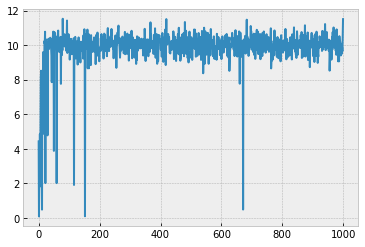

In [64]:
#Numerical Preference Vector:
H = np.zeros(10);
#Probability Vector:
pi_prob = np.exp(H)/np.sum(np.exp(H))
#First exploratory:
arm_Index = np.zeros(10)
#Matrix of got Values:
obs_R = np.zeros(n_obs)
#Number of observations per value distribution
N = np.zeros(10)
#Reward inicialization:
crrn_Reward = 0
#Alpha StepSize Value
alpha = 0.1
#Start counting time of execution:
GBA_start_time = time.time()
#Loop of the Agent interaction
for i in range(n_obs):
    ####################################################################
    arm_Index = get_Index_from_Prob(pi_prob)
    ####################################################################
    # R <-- bandit(A)
    crrn_Reward = gauss(expct_Val[arm_Index],expct_Val[arm_Index]*0.05)
    #In memory
    obs_R[i] = crrn_Reward
    # N(A) <-- N(A) + 1
    N[arm_Index] += 1
    #H(t+1) = H(t) + alpha*(1a=A-PIt(At))*(Rt-Rpromt)
    #Baseline Reward:
    R_base = np.sum(obs_R)/(i+1)
    # First H(A) = H(A0) - alpha(PIt(At))*(Rt-Rpromt) for each A=ak
    # Then H(A=a) = H(A=a) + alpha*(Rt-Rpromt)
    # So that H(A=a) = H(A=a) + alpha*(Rt-Rpromt)*(1-PIt(At))
    H -= alpha*(pi_prob)*(crrn_Reward-R_base)
    H[arm_Index] += alpha*(crrn_Reward-R_base)
    #Update the Probability Vector
    pi_prob = np.exp(H)/np.sum(np.exp(H))
    ####################################################################
#Print the time of execution:
GBA_finish_time = time.time()
print("--- It took %s seconds ---" % (GBA_finish_time - GBA_start_time))
#Plot the observed data:
plt.figure()
plt.plot(np.arange(n_obs),obs_R)